In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import (symbols, simplify)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy.physics.mechanics import Lagrangian, ReferenceFrame, Point, Particle,inertia, RigidBody, angular_momentum

In [3]:
from optibot.symbolic import lagrange, diff_to_symb, SimpLagrangesMethod
from optibot.numpy import unpack

In [4]:
init_vprinting()

### Symbolic Problem Modelling

In [5]:
m0, m1, m2, m3, m4, l0, l1, l2, l3, l4, t, g = symbols('m_0:5 l_0:5 t g')
I0, I1, I2, I3, I4, d0, d1, d2, d3, d4 = symbols('I_0:5 d_0:5')
q0, q1, q2, q3, q4 = dynamicsymbols('q_0:5')
m0, m1, m2, m3, m4, l0, l1, l2, l3, l4, t, g, I0, I1, I2, I3, I4, d0, d1, d2, d3, d4, q0, q1, q2, q3, q4

In [6]:
N_in = ReferenceFrame('N')
P0 = Point('P0')
P0.set_vel(N_in, 0)

N0 = N_in.orientnew('N0', 'Axis', [q0, N_in.z])
P1 = P0.locatenew('P1', l0 * N0.y)
P1.set_vel(N_in, P1.pos_from(P0).dt(N_in))
CM0 = P0.locatenew('CM0', (l0-d0) * N0.y)
CM0.set_vel(N_in, CM0.pos_from(P0).dt(N_in))
I_0 = inertia(N0, 0, 0, I0)
body0 = RigidBody('Stance_Tibia', CM0, N0, m0, (I_0,CM0))
body0.potential_energy = m0 * g * CM0.pos_from(P0).dot(N_in.y)


N1 = N_in.orientnew('N1', 'Axis', [q1, N_in.z])
P2 = P1.locatenew('P2', l1 * N1.y)
P2.set_vel(N_in, P2.pos_from(P0).dt(N_in))
CM1 = P1.locatenew('CM1', (l1-d1) * N1.y)
CM1.set_vel(N_in, CM1.pos_from(P0).dt(N_in))
I_1 = inertia(N1, 0, 0, I1)
body1 = RigidBody('Stance_Femur', CM1, N1, m1, (I_1,CM1))
body1.potential_energy = m1 * g * CM1.pos_from(P0).dot(N_in.y)


N2 = N_in.orientnew('N2', 'Axis', [q2, N_in.z])
P3 = P2.locatenew('P3', l2 * N2.y)
P3.set_vel(N_in, P3.pos_from(P0).dt(N_in))
CM2 = P2.locatenew('CM2', d2 * N2.y)
CM2.set_vel(N_in, CM2.pos_from(P0).dt(N_in))
I_2 = inertia(N2, 0, 0, I2)
body2 = RigidBody('Torso', CM2, N2, m2, (I_2,CM2))
body2.potential_energy = m2 * g * CM2.pos_from(P0).dot(N_in.y)


N3 = N_in.orientnew('N3', 'Axis', [q3, N_in.z])
P4 = P2.locatenew('P4', -l3 * N3.y)
P4.set_vel(N_in, P4.pos_from(P0).dt(N_in))
CM3 = P2.locatenew('CM3', -d3 * N3.y)
CM3.set_vel(N_in, CM3.pos_from(P0).dt(N_in))
I_3 = inertia(N3, 0, 0, I3)
body3 = RigidBody('Swing_Femur', CM3, N3, m3, (I_3,CM3))
body3.potential_energy = m3 * g * CM3.pos_from(P0).dot(N_in.y)


N4 = N_in.orientnew('N4', 'Axis', [q4, N_in.z])
P5 = P4.locatenew('P5', -l4 * N4.y)
P5.set_vel(N_in, P5.pos_from(P0).dt(N_in))
CM4 = P4.locatenew('CM4', -d4 * N4.y)
CM4.set_vel(N_in, CM4.pos_from(P0).dt(N_in))
I_4 = inertia(N4, 0, 0, I4)
body4 = RigidBody('Swing_Tibia', CM4, N4, m4, (I_4,CM4))
body4.potential_energy = m4 * g * CM4.pos_from(P0).dot(N_in.y)

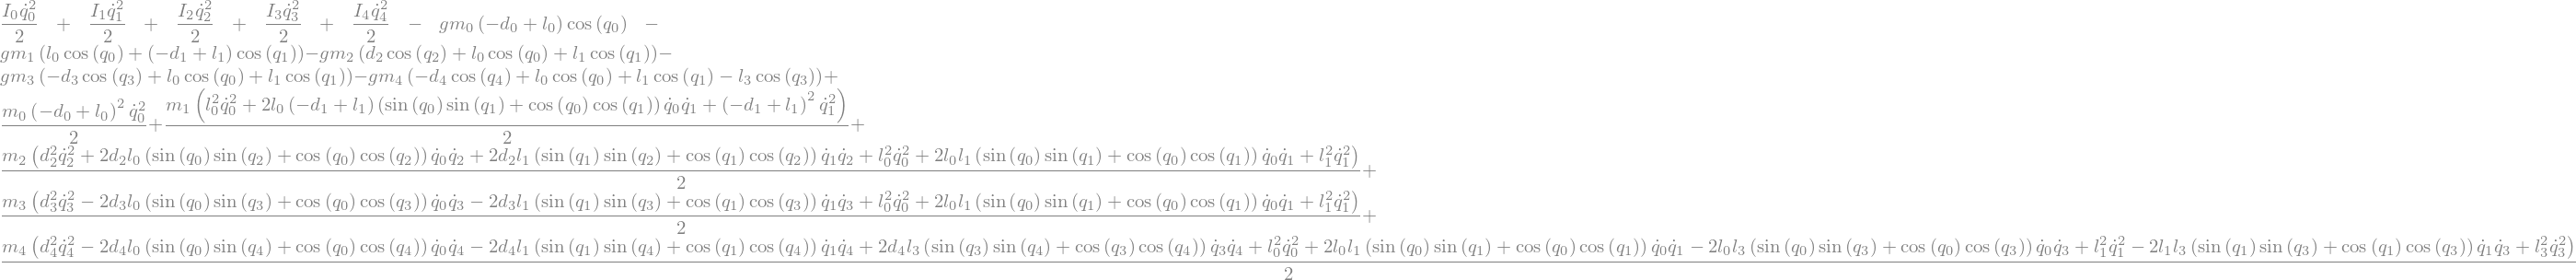

In [7]:
Lag_simp = Lagrangian(N_in, body0, body1, body2, body3, body4)
Lag_simp

In [8]:
from optibot.symbolic import ImplicitLagrangesMethod

In [9]:
u0, u1, u2, u3, u4 = symbols('u_:5')
FL = [
    (N0, (u0-u1) * N_in.z),
    (N1, (u1-u2) * N_in.z),
    (N2, (u2-u3) * N_in.z),
    (N3, (u3-u4) * N_in.z),
    (N4, u4 * N_in.z)
]
LM_small = ImplicitLagrangesMethod(Lag_simp, [q0, q1, q2, q3, q4], forcelist=FL, frame=N_in)

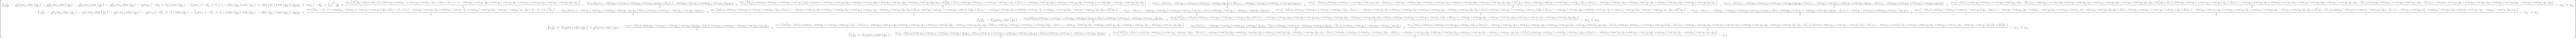

In [10]:
LM_small.form_lagranges_equations()

In [11]:
impl_x = LM_small.implicit_dynamics_x

In [12]:
impl_q = LM_small.implicit_dynamics_q

In [13]:
from optibot.casadi import implicit_dynamic_q_to_casadi_function, implicit_dynamic_x_to_casadi_function
from optibot.symbolic import find_arguments

In [14]:
find_arguments(impl_q, list(LM_small._q), separate_as=True, separate_lambdas=True, verbose=True)

x vars expected: [q_0, q_1, q_2, q_3, q_4, v_0, v_1, v_2, v_3, v_4]
x vars found: [q_0, q_1, q_2, q_3, q_4, v_0, v_1, v_2, v_3, v_4]
u vars found: [u_0, u_1, u_2, u_3, u_4]
Lambda variables are separated from parameters
lambda vars found: []
a variables are separated from parameters
a vars expected: [a_0, a_1, a_2, a_3, a_4]
a vars found: [a_0, a_1, a_2, a_3, a_4]
Parameters found: [I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4]


In [15]:
imp_dyn_x_f_cas = implicit_dynamic_x_to_casadi_function(impl_x, list(dynamicsymbols('x_0:10')), verbose=True)

x vars expected: [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_0_dot, x_1_dot, x_2_dot, x_3_dot, x_4_dot, x_5_dot, x_6_dot, x_7_dot, x_8_dot, x_9_dot]
x vars found: [x_0, x_0_dot, x_1, x_1_dot, x_2, x_2_dot, x_3, x_3_dot, x_4, x_4_dot, x_5, x_5_dot, x_6, x_6_dot, x_7, x_7_dot, x_8, x_8_dot, x_9, x_9_dot]
u vars found: [u_0, u_1, u_2, u_3, u_4]
Lambda variables are separated from parameters
lambda vars found: []
a variables are not separated from parameters
Parameters found: [I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4]
Function Arguments:
	x: [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9]
	x_dot: [x_0_dot, x_1_dot, x_2_dot, x_3_dot, x_4_dot, x_5_dot, x_6_dot, x_7_dot, x_8_dot, x_9_dot]
	u: [u_0, u_1, u_2, u_3, u_4]
	lambdas: []
	params: [I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4]



In [16]:
imp_dyn_q_f_cas = implicit_dynamic_q_to_casadi_function(impl_q, list(LM_small.q), verbose=True)

x vars expected: [q_0, q_1, q_2, q_3, q_4, v_0, v_1, v_2, v_3, v_4]
x vars found: [q_0, q_1, q_2, q_3, q_4, v_0, v_1, v_2, v_3, v_4]
u vars found: [u_0, u_1, u_2, u_3, u_4]
Lambda variables are separated from parameters
lambda vars found: []
a variables are separated from parameters
a vars expected: [a_0, a_1, a_2, a_3, a_4]
a vars found: [a_0, a_1, a_2, a_3, a_4]
Parameters found: [I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4]
Function Arguments:
	q: [q_0, q_1, q_2, q_3, q_4]
	v: [v_0, v_1, v_2, v_3, v_4]
	a: [a_0, a_1, a_2, a_3, a_4]
	u: [u_0, u_1, u_2, u_3, u_4]
	lambda: []
	params: [I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4]



Lag_num = Lag_simp.subs([
    [m0,3.2],
    [m1,6.8],
    [m2,20],
    [m3,6.8],
    [m4,3.2],
    [l0,0.4],
    [l1,0.4],
    [l2,0.625],
    [l3,0.4],
    [l4,0.4],
    [I0,0.93],
    [I1,1.08],
    [I2,2.22],
    [I3,1.08],
    [I4,0.93],
    [d0,1.128],
    [d1,0.163],
    [d2,0.2],
    [d3,0.163],
    [d4,0.128],
    [g, 9.81]
])
Lag_num

In [17]:
imp_dyn_x_f_cas

Function(M:(x[10],x_dot[10],u[5],lambdas[0],params[19])->(residue[1x10]) MXFunction)

In [18]:
from optibot.symbolic import diff_to_symb_expr

In [19]:
feet_x = P5.pos_from(P0).dot(N_in.x)
feet_x = diff_to_symb_expr(feet_x)
feet_x

In [20]:
feet_y = P5.pos_from(P0).dot(N_in.y)
feet_y = diff_to_symb_expr(feet_y)
feet_y

In [21]:
feet_y_vel = P5.vel(N_in).dot(N_in.y)   #pos_from(P0).dot(N_in.y)
feet_y_vel = diff_to_symb_expr(feet_y_vel)
feet_y_vel

In [22]:
cm_pos = m0*CM0.pos_from(P0)
cm_pos += m1*CM1.pos_from(P0)
cm_pos += m2*CM2.pos_from(P0)
cm_pos += m3*CM3.pos_from(P0)
cm_pos += m4*CM4.pos_from(P0)
cm_pos = cm_pos/(m0+m1+m2+m3+m4)

sys_CM = P0.locatenew('Sys_CM', cm_pos)
sys_CM_x = simplify(sys_CM.pos_from(P0).dot(N_in.x))
sys_CM_y = simplify(sys_CM.pos_from(P0).dot(N_in.y))

In [23]:
from sympy import lambdify

In [24]:
import casadi as cas
from optibot.casadi import sympy2casadi

In [25]:
sym_x = dynamicsymbols('q_0:5')
sym_x = sym_x + [ii.diff() for ii in sym_x]
sym_x = [diff_to_symb(ii) for ii in sym_x]
sym_params = list(symbols('I_0:5 d_0:5 g l_0:2 l_3 m_0:5'))
sym_add_params = [symbols('l_4'),]
sym_vars = sym_x + sym_params + sym_add_params

print(len(sym_vars), sym_vars)

30 [q_0, q_1, q_2, q_3, q_4, v_0, v_1, v_2, v_3, v_4, I_0, I_1, I_2, I_3, I_4, d_0, d_1, d_2, d_3, d_4, g, l_0, l_1, l_3, m_0, m_1, m_2, m_3, m_4, l_4]


In [26]:
cas_x_args = cas.MX.sym("x", len(sym_x))
cas_params = cas.MX.sym("p", len(sym_params))
cas_add_params = cas.MX.sym("p_add", len(sym_add_params))
cas_all_vars = [cas_x_args[ii] for ii in range(len(sym_x))]
cas_all_vars += [cas_params[ii] for ii in range(len(sym_params))]
cas_all_vars += [cas_add_params[ii] for ii in range(len(sym_add_params))]
print(len(cas_all_vars), cas_all_vars)

30 [MX(x[0]), MX(x[1]), MX(x[2]), MX(x[3]), MX(x[4]), MX(x[5]), MX(x[6]), MX(x[7]), MX(x[8]), MX(x[9]), MX(p[0]), MX(p[1]), MX(p[2]), MX(p[3]), MX(p[4]), MX(p[5]), MX(p[6]), MX(p[7]), MX(p[8]), MX(p[9]), MX(p[10]), MX(p[11]), MX(p[12]), MX(p[13]), MX(p[14]), MX(p[15]), MX(p[16]), MX(p[17]), MX(p[18]), MX(p_add)]


In [27]:
_cas_expr_temp_x = sympy2casadi(feet_x, sym_vars, cas_all_vars)
feet_x_cas = cas.Function(
        "Feet_x",
        [cas_x_args, cas_params, cas_add_params],
        [_cas_expr_temp_x,],
        ["x", "params", "additional_params"],
        ["feet_x_position"],
    )

In [28]:
feet_x_cas

Function(Feet_x:(x[10],params[19],additional_params)->(feet_x_position) MXFunction)

In [29]:
_cas_expr_temp_y = sympy2casadi(feet_y, sym_vars, cas_all_vars)
feet_y_cas = cas.Function(
        "Feet_y",
        [cas_x_args, cas_params, cas_add_params],
        [_cas_expr_temp_y,],
        ["x", "params", "additional_params"],
        ["feet_y_position"],
    )

In [30]:
feet_y_cas

Function(Feet_y:(x[10],params[19],additional_params)->(feet_y_position) MXFunction)

In [31]:
_cas_expr_temp_y_vel = sympy2casadi(feet_y_vel, sym_vars, cas_all_vars)
feet_y_vel_cas = cas.Function(
        "Feet_y_vel",
        [cas_x_args, cas_params, cas_add_params],
        [_cas_expr_temp_y_vel,],
        ["x", "params", "additional_params"],
        ["feet_y_speed"],
    )

In [32]:
feet_y_vel_cas

Function(Feet_y_vel:(x[10],params[19],additional_params)->(feet_y_speed) MXFunction)

In [33]:
def simetric_cond_casadi(n = 5):
    x1 = cas.MX.sym('x_1', 2*n)
    x2 = cas.MX.sym('x_2', 2*n)
    cond = [x1[ii] - x2[n-1-ii] for ii in range(n)]
    cas_funcs = cas.horzcat(*cond)
    return cas.Function(
        "Sim_cond",
        [x1, x2],
        [cas_funcs,],
        ["x_1", "x2"],
        ["residue"],
    )

In [34]:
simetric_5_links = simetric_cond_casadi(5)
simetric_5_links

Function(Sim_cond:(x_1[10],x2[10])->(residue[1x5]) MXFunction)

In [35]:
bodies = [body0, body1, body2, body3, body4]
points_right = [P0, P1, P2, P2, P4]
points_left = [P5, P4, P2, P2, P1]
subs_key = list(zip(dynamicsymbols('q_0:5'),dynamicsymbols('q_p_0:5')))

impact_eqs = []
for ii in range(5):
    print('calculating eq', ii)
    print('\tleft side')
    left_side = angular_momentum(points_left[ii], N_in, *bodies[:5-ii]).dot(N_in.z)
    left_side = simplify(left_side)
    print('\tright side')
    right_side = angular_momentum(points_right[ii], N_in, *bodies[ii:]).dot(N_in.z)
    right_side = simplify(right_side).subs(subs_key)
    impact_eqs.append(left_side-right_side)
#impact_eqs

calculating eq 0
	left side
	right side
calculating eq 1
	left side
	right side
calculating eq 2
	left side
	right side
calculating eq 3
	left side
	right side
calculating eq 4
	left side
	right side


In [36]:
for ii in range(5):
    print(points_left[ii],bodies[:5-ii])
for ii in range(5):
    print(points_right[ii],bodies[ii:])

P5 [Stance_Tibia, Stance_Femur, Torso, Swing_Femur, Swing_Tibia]
P4 [Stance_Tibia, Stance_Femur, Torso, Swing_Femur]
P2 [Stance_Tibia, Stance_Femur, Torso]
P2 [Stance_Tibia, Stance_Femur]
P1 [Stance_Tibia]
P0 [Stance_Tibia, Stance_Femur, Torso, Swing_Femur, Swing_Tibia]
P1 [Stance_Femur, Torso, Swing_Femur, Swing_Tibia]
P2 [Torso, Swing_Femur, Swing_Tibia]
P2 [Swing_Femur, Swing_Tibia]
P4 [Swing_Tibia]


In [37]:
def impact_cond_casadi(eqs, x1_sym, x2_sym, sym_params, sym_add_params):
    x1_sym = [diff_to_symb(ii) for ii in x1_sym]
    x2_sym = [diff_to_symb(ii) for ii in x2_sym]
    eqs = [diff_to_symb_expr(ii) for ii in eqs]

    all_vars = x1_sym + x2_sym + sym_params + sym_add_params
    n = len(x1_sym)
    cas_x1 = cas.MX.sym('x_1', n)
    cas_x2 = cas.MX.sym('x_2', n)
    cas_params = cas.MX.sym("p", len(sym_params))
    cas_add_params = cas.MX.sym("p_add", len(sym_add_params))
    cas_all_vars = [cas_x1[ii] for ii in range(n)]
    cas_all_vars += [cas_x2[ii] for ii in range(n)]
    cas_all_vars += [cas_params[ii] for ii in range(len(sym_params))]
    cas_all_vars += [cas_add_params[ii] for ii in range(len(sym_add_params))]
    
    cas_funcs = []
    for function in eqs:
        cas_funcs.append(sympy2casadi(function, all_vars, cas_all_vars))
    cas_funcs = cas.horzcat(*cas_funcs)
    return cas.Function(
        "Sim_cond",
        [cas_x1, cas_x2, cas_params, cas_add_params],
        [cas_funcs,],
        ["x_1", "x2", 'params', 'additional_params'],
        ["residue"],
    )

In [38]:
sym_x = dynamicsymbols('q_0:5')
sym_x = sym_x + [ii.diff() for ii in sym_x]
subs_key = list(zip(dynamicsymbols('q_0:5'),dynamicsymbols('q_p_0:5')))
sym_x_2 = [ii.subs(subs_key) for ii in sym_x]
impact_cond_cas_f = impact_cond_casadi(impact_eqs, sym_x,  sym_x_2, sym_params, sym_add_params)

In [39]:
impact_cond_cas_f

Function(Sim_cond:(x_1[10],x2[10],params[19],additional_params)->(residue[1x5]) MXFunction)

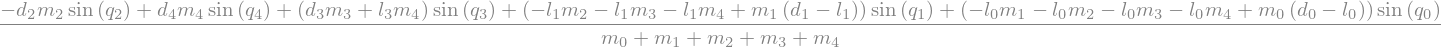

In [40]:
sys_CM_x

In [41]:
sym_x, sym_params

In [42]:
sys_cm_np = lambdify([sym_x, sym_params], [sys_CM_x, sys_CM_y],'numpy')

In [43]:
ang_mom_p0 = angular_momentum(P0, N_in, *bodies).dot(N_in.z)
ang_mom_p0_np = lambdify([sym_x, sym_params], ang_mom_p0,'numpy')

In [44]:
ang_mom_p5 = angular_momentum(P5, N_in, *bodies).dot(N_in.z)
ang_mom_p5_np = lambdify([sym_x, sym_params, sym_add_params], ang_mom_p5,'numpy')

In [45]:
P5_static = P5.locatenew('P5_static', 0 * N_in.y)
P5_static.set_vel(N_in, 0 * N_in.y)

In [46]:
ang_mom_p5_static = angular_momentum(P5_static, N_in, *bodies).dot(N_in.z)
ang_mom_p5_static_np = lambdify([sym_x, sym_params, sym_add_params], ang_mom_p5_static,'numpy')

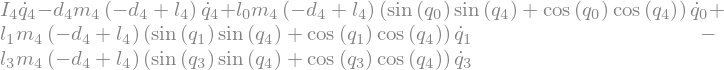

In [47]:
angular_momentum(P5_static, N_in, bodies[-1]).dot(N_in.z)

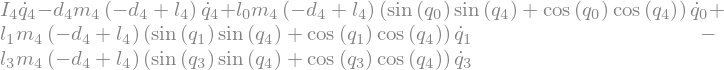

In [48]:
angular_momentum(P5, N_in, bodies[-1]).dot(N_in.z)

In [49]:
from sympy.physics.mechanics import kinetic_energy, potential_energy

In [50]:
angular_momentum(P0, N_in, bodies[0]).dot(N_in.z)

In [51]:
system_energy = potential_energy(*bodies) + kinetic_energy(N_in, *bodies)

In [52]:
system_energy_np = lambdify([sym_x, sym_params], system_energy,'numpy')

In [53]:
mass_matrix_np = lambdify([sym_x, sym_params], LM_small.mass_matrix,'numpy')

In [54]:
sym_u = symbols('u_:5')
F_impl_np = lambdify([sym_x, sym_u, symbols('placeholder'), sym_params], LM_small.forcing,'numpy')

### Casadi optimization

In [55]:
from optibot.casadi import accelrestriction2casadi
from optibot.schemes import (euler_accel_restr, trapz_accel_restr, trapz_mod_accel_restr,
                             hs_mod_accel_restr, hs_accel_restr, hs_half_x)

In [56]:
I_0_n, I_1_n, I_2_n, I_3_n, I_4_n = 0.93, 1.08, 2.22, 1.08, 0.93
d_0_n, d_1_n, d_2_n, d_3_n, d_4_n = 0.128, 0.163, 0.2, 0.163, 0.128
g_n = 9.81
l_0_n, l_1_n, l_2_n, l_3_n, l_4_n = 0.4, 0.4, 0.625, 0.4, 0.4
m_0_n, m_1_n, m_2_n, m_3_n, m_4_n = 3.2, 6.8, 20, 6.8, 3.2
params = [
    I_0_n, I_1_n, I_2_n, I_3_n, I_4_n,
    d_0_n, d_1_n, d_2_n, d_3_n, d_4_n,
    g_n,
    l_0_n, l_1_n, l_3_n,
    m_0_n, m_1_n, m_2_n, m_3_n, m_4_n
]
additional_params = [l_4_n,]

In [57]:
opti = cas.Opti()
p_opts = {}#{"expand":True,'ipopt.print_level':0, 'print_time':0}
s_opts = {}#{"max_iter": 10000, 'tol': 1e-26}#, 'linear_solver' : "MA27"}
opti.solver("ipopt",p_opts,
                    s_opts)

In [58]:
N = 25
X = opti.variable(N+1,10)
X_dot = opti.variable(N+1,10)
U = opti.variable(N+1,5)
U_c = opti.variable(N,5)
X_c = opti.variable(N,10)
X_dot_c = opti.variable(N,10)

In [59]:
T = opti.parameter()
u_m = opti.parameter()
Params_opti = opti.parameter(len(params))
Add_params_opti = opti.parameter(len(additional_params))
D = opti.parameter()

In [60]:
#cost = cas.sum2((cas.sum1(U[:,:]**2)+cas.sum1(U[1:-1,:]**2))/N)
cost = cas.sum2((4*cas.sum1(U_c[:,:]**2) + cas.sum1(U[:,:]**2)+cas.sum1(U[1:-1,:]**2))/(3*N))
#cost = cas.sum2(cas.sum1(U**2))
opti.minimize(cost)

In [61]:
impact_cond_cas_f

Function(Sim_cond:(x_1[10],x2[10],params[19],additional_params)->(residue[1x5]) MXFunction)

In [62]:
#Periodic gait constraint:
opti.subject_to(simetric_5_links(X[0,:], X[-1,:]) == 0)
opti.subject_to(impact_cond_cas_f(X[-1,:], X[0,:], Params_opti, Add_params_opti) == 0)

In [63]:
#Step size constraint:
opti.subject_to(feet_x_cas(X[-1,:], Params_opti, Add_params_opti) == D)
opti.subject_to(feet_y_cas(X[-1,:], Params_opti, Add_params_opti) == 0)

In [64]:
#Small Feet Conditions:
opti.subject_to(U[:,0] == 0)
opti.subject_to(U_c[:,0] == 0)
opti.subject_to(feet_y_vel_cas(X[0,:], Params_opti, Add_params_opti)>0)
opti.subject_to(feet_y_vel_cas(X[-1,:], Params_opti, Add_params_opti)<0)

In [65]:
#Feet over ground Restrictions:
for ii in range(1,N):
    opti.subject_to(feet_y_cas(X[ii,:], Params_opti, Add_params_opti) > 0)

In [66]:
imp_dyn_x_f_cas

Function(M:(x[10],x_dot[10],u[5],lambdas[0],params[19])->(residue[1x10]) MXFunction)

In [67]:
#Dynamics Constraints:
for ii in range(N+1):
    opti.subject_to(imp_dyn_x_f_cas(X[ii,:], X_dot[ii,:], U[ii,:], [], Params_opti) == 0)
for ii in range(N):
    opti.subject_to(X_c[ii,:] == hs_half_x(X[ii,:], X[ii+1,:], X_dot[ii,:], X_dot[ii+1,:], T/N))
    opti.subject_to(imp_dyn_x_f_cas(X_c[ii,:], X_dot_c[ii,:], U_c[ii,:], [], Params_opti) == 0)

In [68]:
#Scheme Constraints
#cas_accel_restr = accelrestriction2casadi(trapz_accel_restr, 5)
cas_accel_restr = accelrestriction2casadi(hs_accel_restr, 5, 5)
for ii in range(N):
    opti.subject_to(cas_accel_restr(X[ii,:], X[ii+1,:], X_dot[ii, 5:], X_dot[ii+1, 5:],T/N, X_dot_c[ii,5:]) == 0)

In [69]:
opti.set_value(T, 0.7)#0.7
opti.set_value(D, 0.5)

In [70]:
opti.set_value(Params_opti, params)
opti.set_value(Add_params_opti, additional_params)

#set initial pose fixed, different problem
opti.subject_to(X[0,:].T == [-0.3, 0.7, 0, -0.5, -0.6, 0,0,0,0,0])
for ii in range(N):
    for jj in range(5):
        opti.subject_to(U[ii,jj] < 2)
        
        opti.subject_to(U[ii,jj] >-2)

In [71]:
q_0_guess = np.array([-0.3, 0.7, 0, -0.5, -0.6])
q_1_guess = q_0_guess[::-1]
s_arr = np.linspace(0, 1, N+1)
q_guess = np.expand_dims(q_0_guess,0)+ np.expand_dims(s_arr,1)*np.expand_dims((q_1_guess - q_0_guess),0)

q_dot_guess = (q_1_guess - q_0_guess) * np.ones([N+1,1])/opti.value(T)

In [72]:
opti.set_initial(X[:,:5], q_guess)
opti.set_initial(X[:,5:], q_dot_guess)

opti.set_initial(X_c[:,:5], (q_guess[:-1,:]+q_guess[1:,:])/2)
opti.set_initial(X_c[:,5:], q_dot_guess[:-1,:])

opti.set_initial(X_dot[:,:5], q_dot_guess)
opti.set_initial(X_dot[:,5:], 0)

opti.set_initial(X_dot_c[:,:5], q_dot_guess[:-1,:])
opti.set_initial(X_dot_c[:,5:], 0)

opti.set_initial(U, 0)
opti.set_initial(U_c, 0)

In [73]:
sol = opti.solve()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     6951
Number of nonzeros in inequality constraint Jacobian.:      112
Number of nonzeros in Lagrangian Hessian.............:     3727

Total number of variables............................:     1275
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1073
Total number of inequality co

In [74]:
U_sol = sol.value(U)
U_c_sol = sol.value(U_c)
X_sol = sol.value(X)
X_c_sol = sol.value(X_c)
X_dot_sol = sol.value(X_dot)
X_dot_c_sol = sol.value(X_dot_c)
T_sol = sol.value(T)
T_sol_arr = np.linspace(0, T_sol, N+1)
T_c_arr = (T_sol_arr[:-1]+T_sol_arr[1:])/2

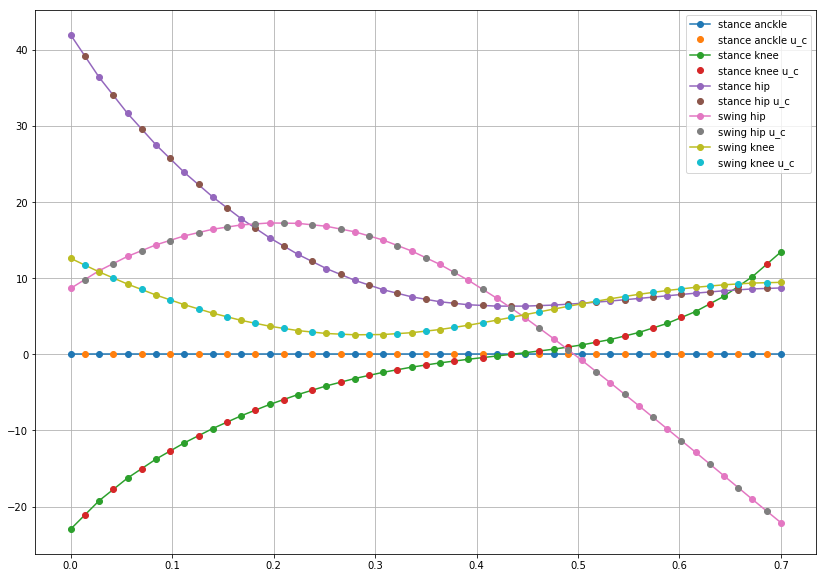

In [75]:
plt.figure(figsize=[14,10])
labels= ['stance anckle', 'stance knee', 'stance hip', 'swing hip', 'swing knee']
for ii in range(5):
    plt.plot(T_sol_arr,U_sol[:,ii], marker = 'o', label = labels[ii])
    plt.plot(T_c_arr,U_c_sol[:,ii], 'o', label = labels[ii] + ' u_c')
plt.grid()
plt.legend()

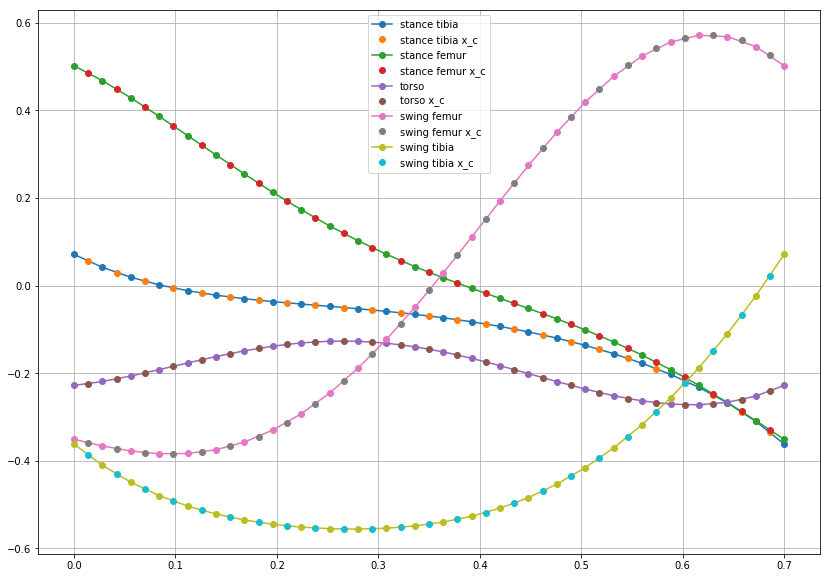

In [76]:
plt.figure(figsize=[14,10])
labels= ['stance tibia', 'stance femur', 'torso', 'swing femur', 'swing tibia']
for ii in range(5):
    plt.plot(T_sol_arr, X_sol[:,ii], marker = 'o', label = labels[ii])
    plt.plot(T_c_arr,X_c_sol[:,ii], 'o', label = labels[ii] + ' x_c')
plt.grid()
plt.legend()

In [77]:
def chain_to_draw(x,params):
    [
    I_0_n, I_1_n, I_2_n, I_3_n, I_4_n,
    d_0_n, d_1_n, d_2_n, d_3_n, d_4_n,
    g_n,
    l_0_n, l_1_n, l_3_n,
    m_0_n, m_1_n, m_2_n, m_3_n, m_4_n
    ] = params
    points_x = [0, ]
    points_y = [0, ]
    points_x.append(points_x[-1] - l_0_n*np.sin(x[0]))
    points_x.append(points_x[-1] - l_1_n*np.sin(x[1]))
    points_x.append(points_x[-1] - l_2_n*np.sin(x[2]))
    points_x.append(points_x[-2])
    points_x.append(points_x[-1] + l_3_n*np.sin(x[3]))
    points_x.append(points_x[-1] + l_4_n*np.sin(x[4]))
    
    
    points_y.append(points_y[-1] + l_0_n*np.cos(x[0]))
    points_y.append(points_y[-1] + l_1_n*np.cos(x[1]))
    points_y.append(points_y[-1] + l_2_n*np.cos(x[2]))
    points_y.append(points_y[-2])
    points_y.append(points_y[-1] - l_3_n*np.cos(x[3]))
    points_y.append(points_y[-1] - l_4_n*np.cos(x[4]))
    
    return points_x, points_y

In [78]:
points_x, points_y = chain_to_draw(X_sol[0], params)

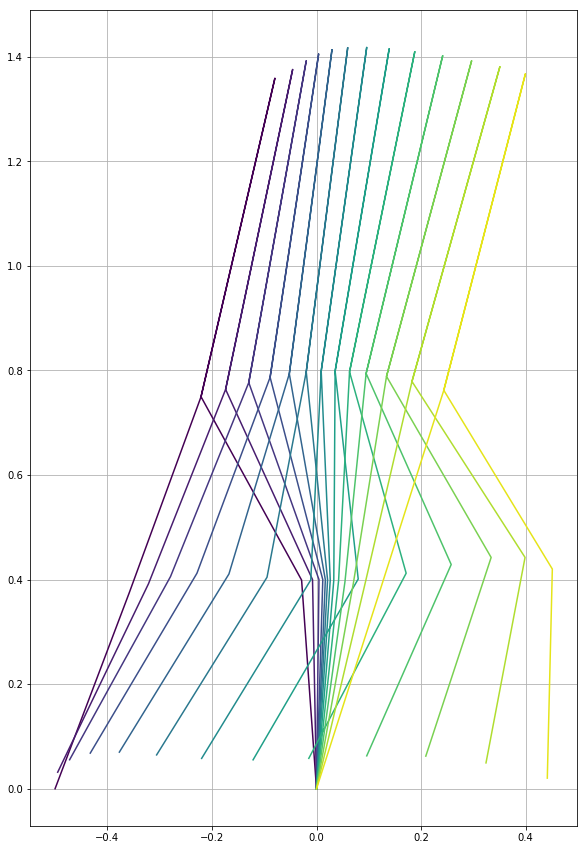

In [79]:
plt.figure(figsize=[15,15])
plt.grid()
for ii in range(0, N+1, 2):
    points_x, points_y = chain_to_draw(X_sol[ii], params)
    plt.plot(points_x, points_y, color = plt.cm.viridis(ii/N))
    

plt.gca().set_aspect('equal')

In [80]:
total_mass = m_0_n + m_1_n + m_2_n + m_3_n + m_4_n
ang_mom_arr = [ang_mom_p0_np(X_sol[ii,:],params) for ii in range(N+1)]
ang_mom_swing_foot_arr = [ang_mom_p5_np(X_sol[ii,:],params, additional_params) for ii in range(N+1)]
ang_mom_swing_foot_static_arr = [ang_mom_p5_static_np(X_sol[ii,:],params, additional_params) for ii in range(N+1)]
cm_torque_arr = [total_mass * -g_n * sys_cm_np(X_sol[ii,:], params)[0] for ii in range(N+1)]
ang_mom_arr_deriv = np.gradient(ang_mom_arr, T_sol_arr)

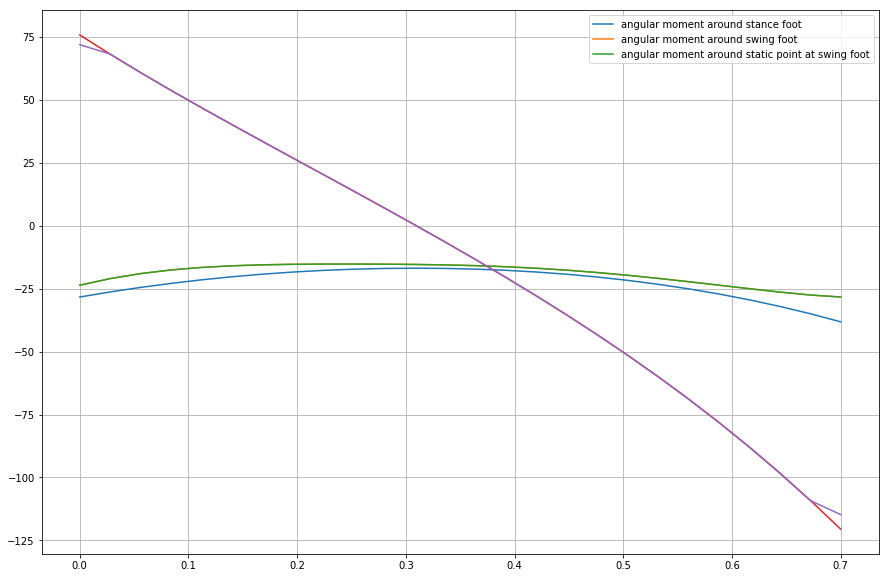

In [81]:
plt.figure(figsize=[15,10])

plt.plot(T_sol_arr, ang_mom_arr, label = 'angular moment around stance foot')
plt.plot(T_sol_arr, ang_mom_swing_foot_arr, label = 'angular moment around swing foot')
plt.plot(T_sol_arr, ang_mom_swing_foot_static_arr, label = 'angular moment around static point at swing foot')
plt.plot(T_sol_arr, cm_torque_arr)
plt.plot(T_sol_arr, ang_mom_arr_deriv)
plt.grid()
plt.legend()

In [82]:
system_energy_arr = [system_energy_np(X_sol[ii,:],params) for ii in range(N+1)]
system_energy_arr_deriv = np.gradient(system_energy_arr, T_sol_arr)
joint_angles = -X_sol[:,:4]+X_sol[:,1:5]
joint_speeds = -X_sol[:,5:9]+X_sol[:,6:10]
external_power = np.sum(joint_speeds*U_sol[:,1:], axis=1)

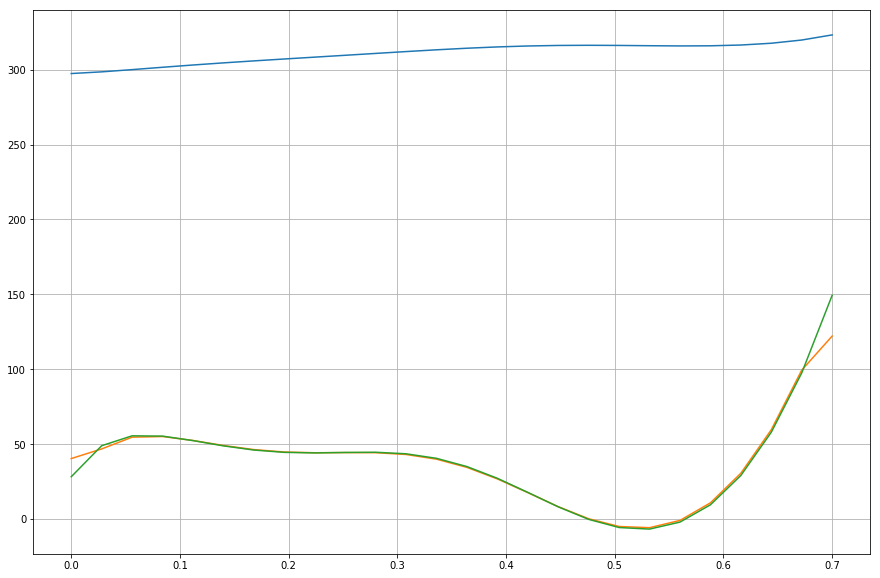

In [83]:
plt.figure(figsize=[15,10])

plt.plot(T_sol_arr, system_energy_arr)
plt.plot(T_sol_arr, system_energy_arr_deriv)
plt.plot(T_sol_arr, external_power)
plt.grid()

C:\ProgramData\Anaconda3\envs\iri\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


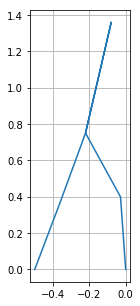

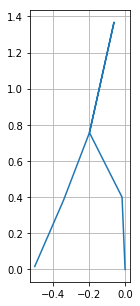

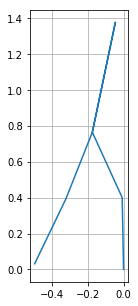

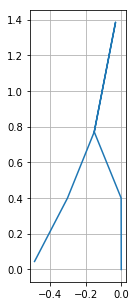

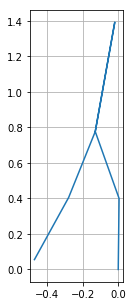

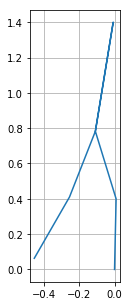

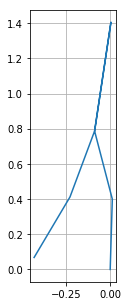

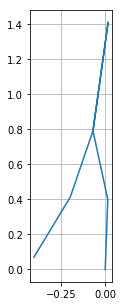

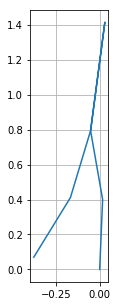

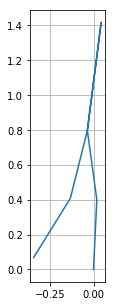

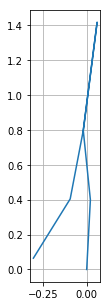

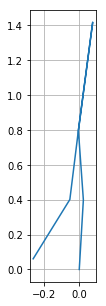

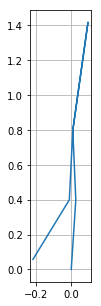

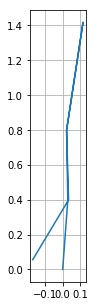

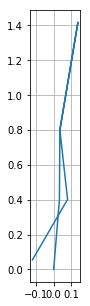

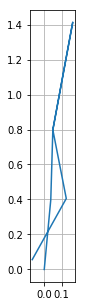

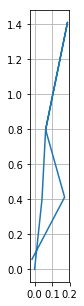

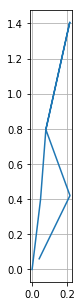

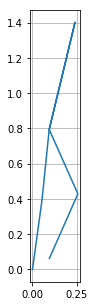

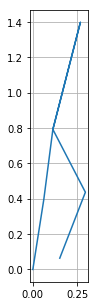

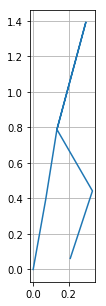

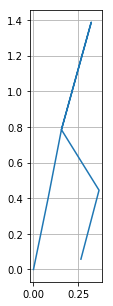

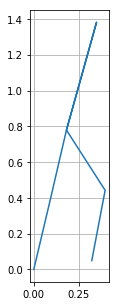

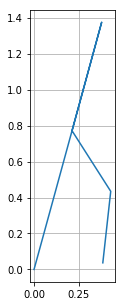

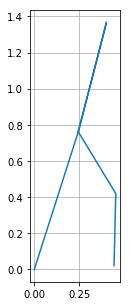

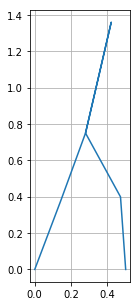

In [84]:

for ii in range(N+1):
    plt.figure(figsize=[5,5])
    plt.grid()
    points_x, points_y = chain_to_draw(X_sol[ii], params)
    plt.plot(points_x, points_y, )
    

    plt.gca().set_aspect('equal')

In [85]:
x_guess = X_sol.copy()
x_guess[:,:5] = q_guess
x_guess[:,5:] = q_dot_guess

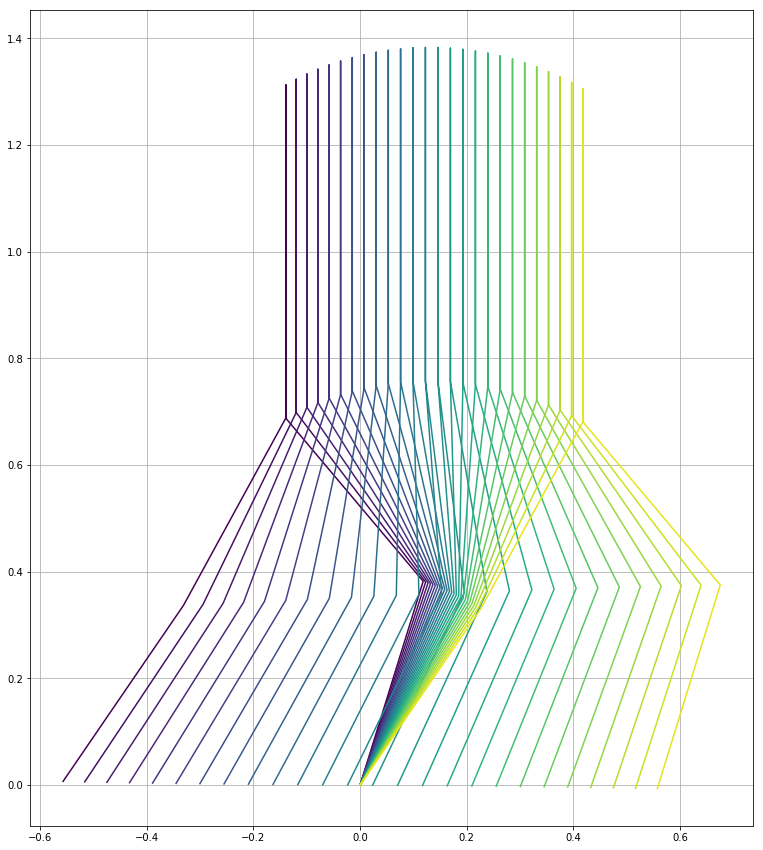

In [86]:
plt.figure(figsize=[15,15])
plt.grid()
for ii in range(N+1):
    points_x, points_y = chain_to_draw(x_guess[ii], params)
    plt.plot(points_x, points_y, color = plt.cm.viridis(ii/26))
    

plt.gca().set_aspect('equal')

In [87]:
from matplotlib import animation, rc
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D
from IPython.display import HTML
import matplotlib

In [88]:
matplotlib.rcParams['animation.embed_limit'] = 200

In [89]:
def create_anim_simp(X, U, params):
    [
    I_0_n, I_1_n, I_2_n, I_3_n, I_4_n,
    d_0_n, d_1_n, d_2_n, d_3_n, d_4_n,
    g_n,
    l_0_n, l_1_n, l_3_n,
    m_0_n, m_1_n, m_2_n, m_3_n, m_4_n
    ] = params
    
    N = X.shape[0]
    fig, ax = plt.subplots()
    draw_width = 14
    draw_height = 14
    
    fig.set_size_inches([draw_width,draw_height])
    ax.set_xlim(( -1, 1))
    ax.set_ylim(( -0.2, 1.8))
    
    line1, = ax.plot([], [], lw=2)
    sys_cm_point, = ax.plot([], [], 'go', ms=12)
    line_sys_cm, = ax.plot([], [], 'k:', lw=1)
    
    ax.grid()
    
    def init():
        line1.set_data([], [])
        sys_cm_point.set_data([], [])
        line_sys_cm.set_data([], [])
        return (line1,sys_cm_point,line_sys_cm)
    
    def animate(i):
        margin_x = -0.25 + i * 0.5/N
        sys_cm_coords = sys_cm_np(X[i,:], params)
        sys_cm_point.set_data(sys_cm_coords)
        line_sys_cm.set_data([0, sys_cm_coords[0]], [0, sys_cm_coords[1]])
        
        ax.set_xlim(( -1+ margin_x, 1+ margin_x))
        points_x, points_y = chain_to_draw(X[i,:], params)
        line1.set_data(points_x, points_y) 
        return (line1,sys_cm_point,line_sys_cm)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, 
                               blit=True)
    return anim

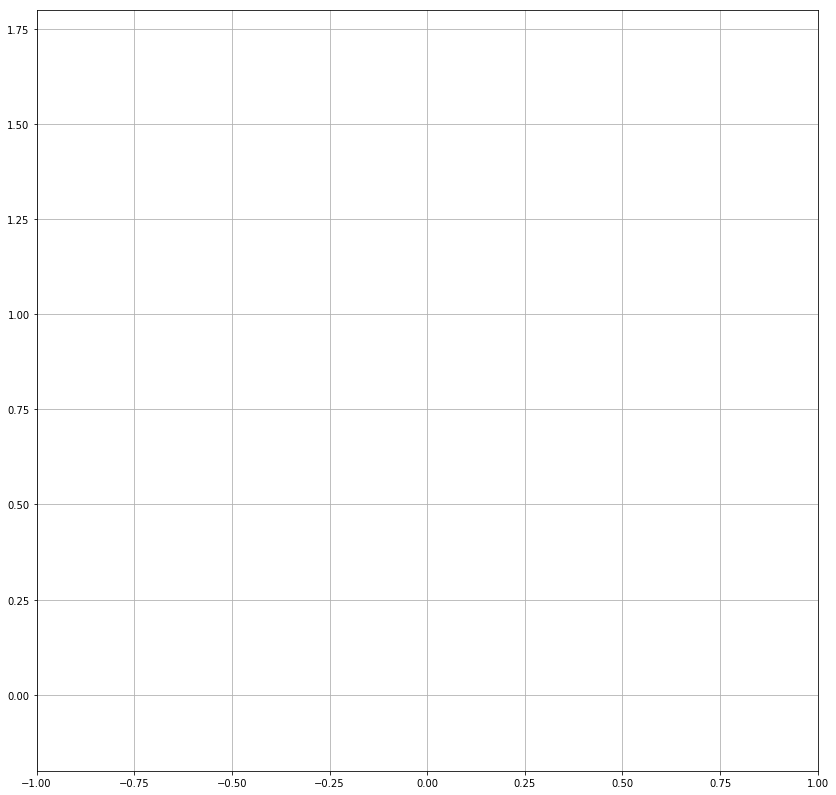

In [90]:
anim_simp = create_anim_simp(X_sol[:-1,:], U_sol, params)

In [91]:
HTML(anim_simp.to_jshtml())

In [92]:
from optibot.schemes import interpolated_array, interpolated_array_derivative
from optibot.analysis import dynamic_error_implicit

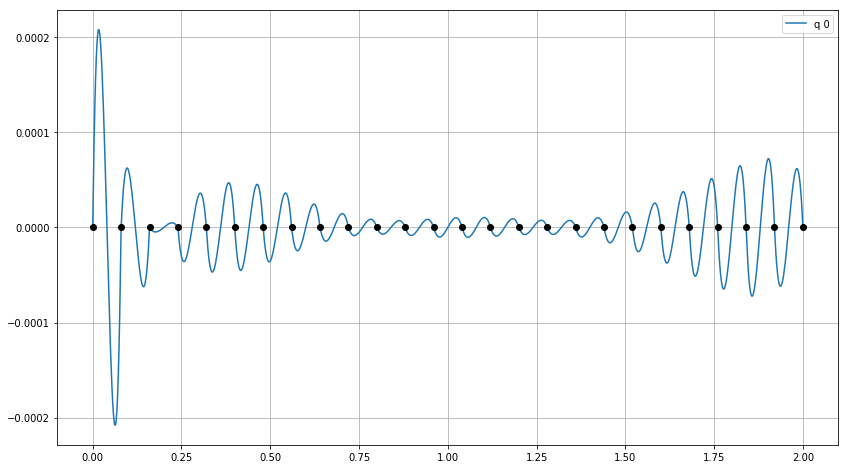

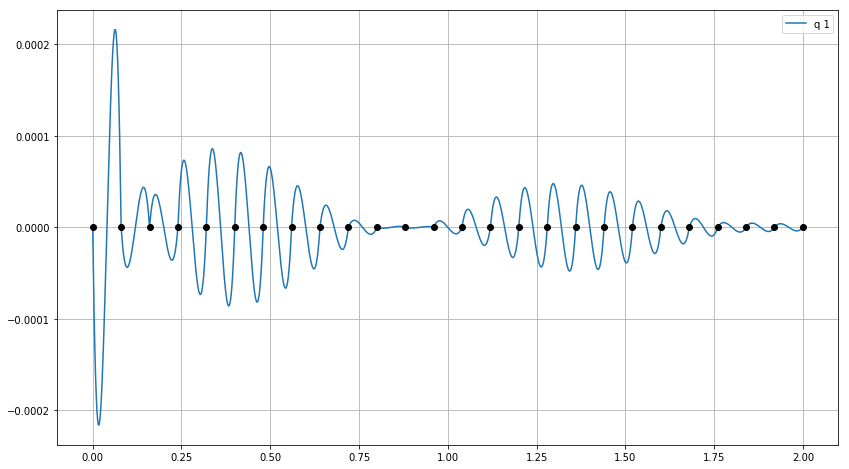

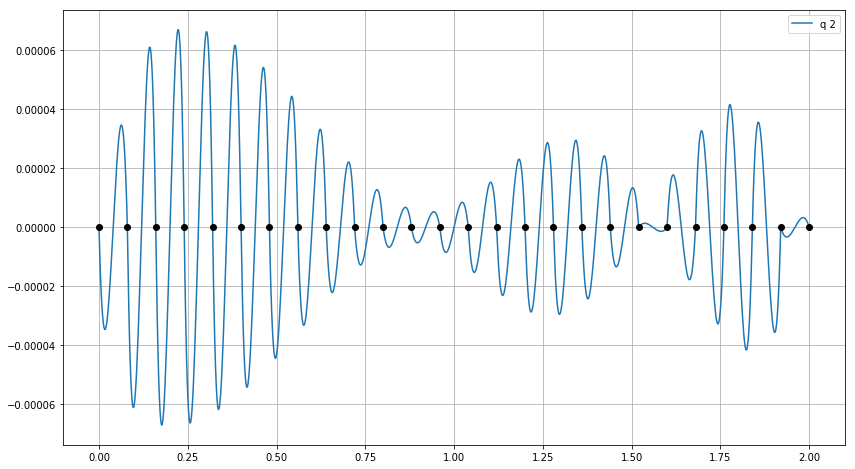

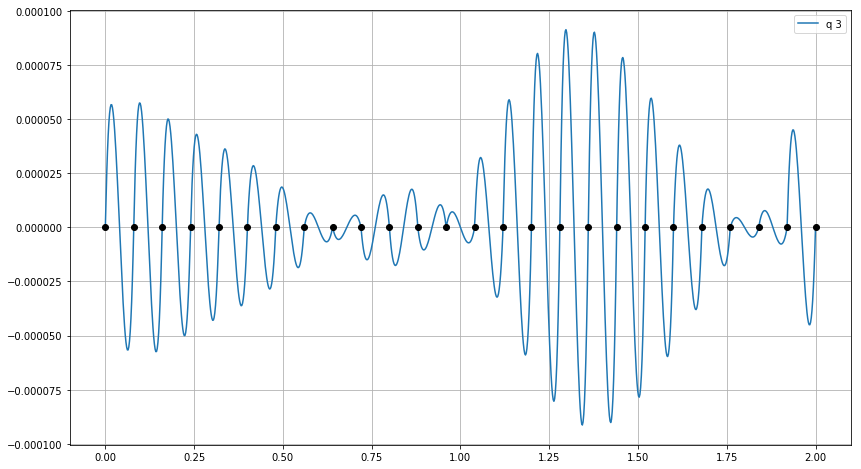

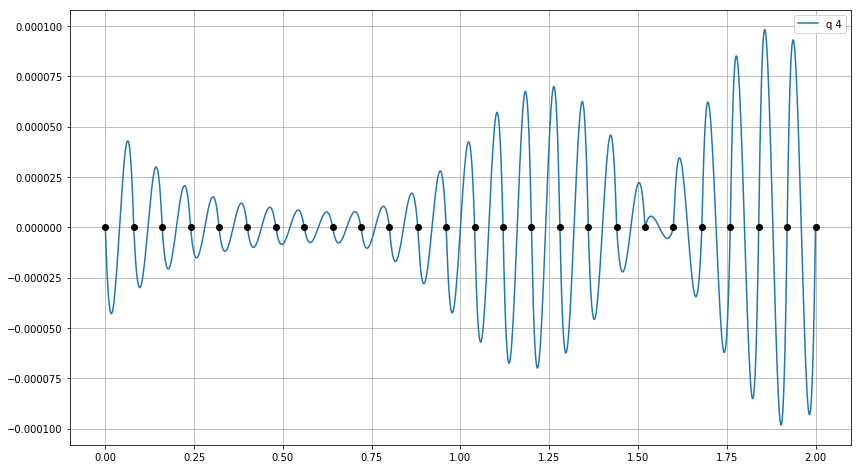

In [93]:
n_graph = 1000
t_arr = np.linspace(0,2,n_graph)
dyn_err_q_hs_lin, dyn_err_v_hs_lin, dyn_err_2_a_hs_lin, dyn_err_2_b_hs_lin = dynamic_error_implicit(
    x_arr=X_sol,
    u_arr=U_sol,
    t_end=T_sol,
    params = params,
    F = F_impl_np,
    M = mass_matrix_np,
    lambda_arr = None,
    scheme = 'hs_parab', 
    u_scheme='parab',
    scheme_params={'u_c':U_c_sol,
                  'x_dot_c': X_dot_c_sol,
                  'x_c': X_c_sol},
    n_interp= n_graph)


for ii in range(5):
    plt.figure(figsize=[14,8])
    plt.plot(t_arr,-dyn_err_q_hs_lin[:,ii], '-', label = f'q {ii}')
    plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
    plt.legend()
    plt.grid()


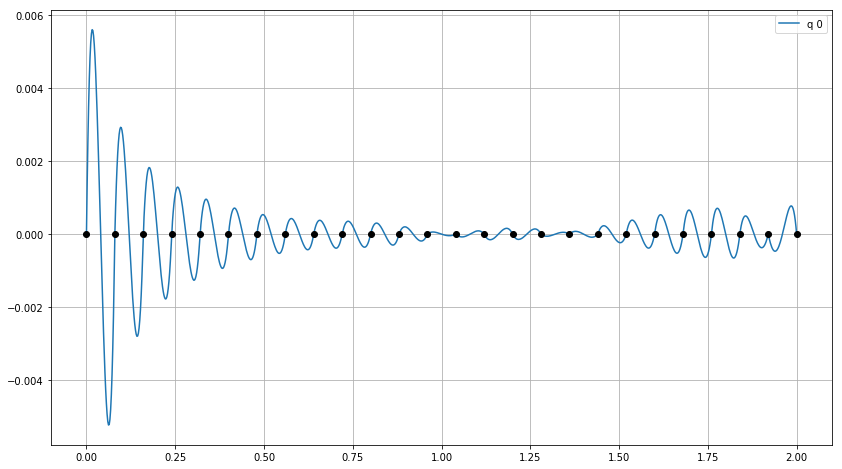

<Figure size 1008x576 with 0 Axes>

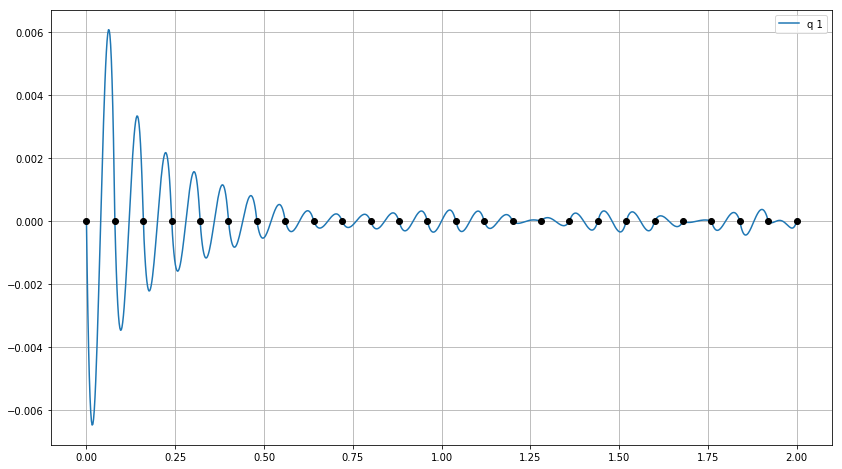

<Figure size 1008x576 with 0 Axes>

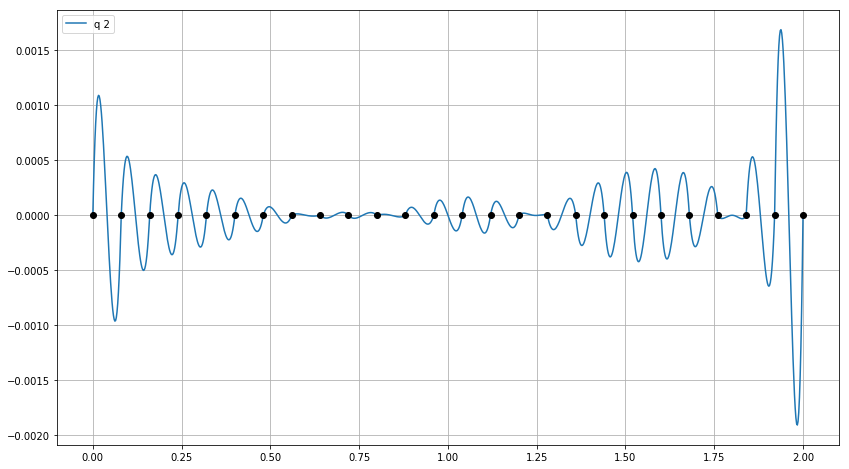

<Figure size 1008x576 with 0 Axes>

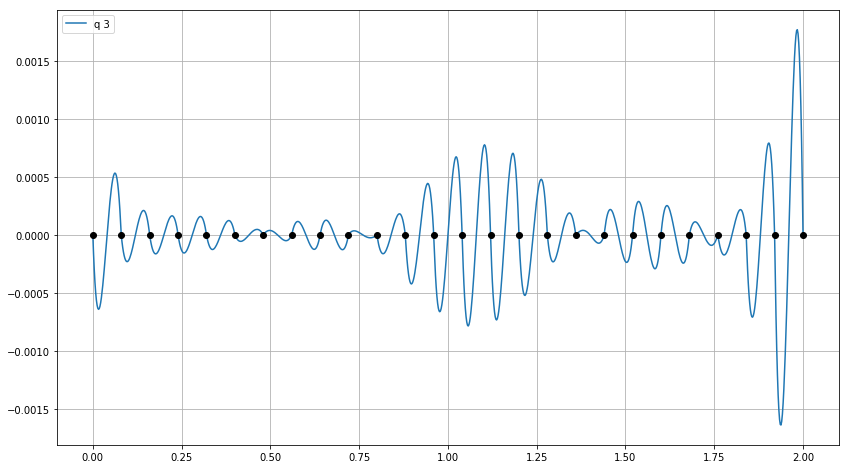

<Figure size 1008x576 with 0 Axes>

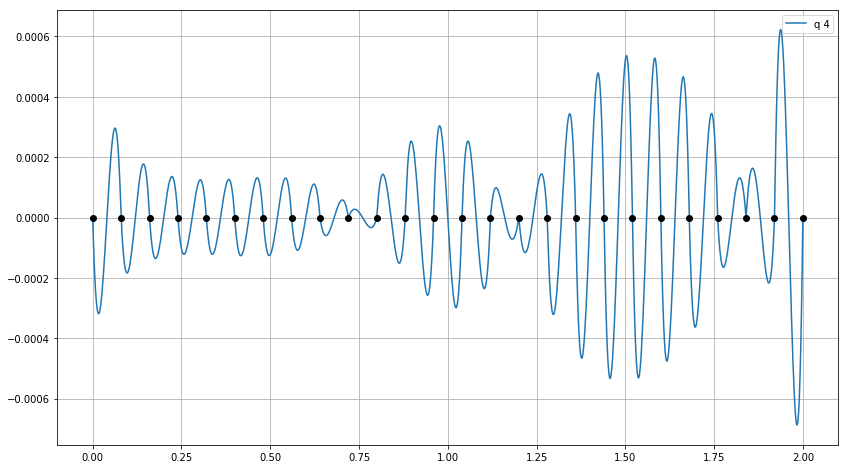

<Figure size 1008x576 with 0 Axes>

In [94]:
for ii in range(5):
    plt.figure(figsize=[14,8])
    plt.plot(t_arr,dyn_err_v_hs_lin[:,ii], '-', label = f'q {ii}')
    plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
    plt.legend()
    plt.grid()
    plt.figure(figsize=[14,8])


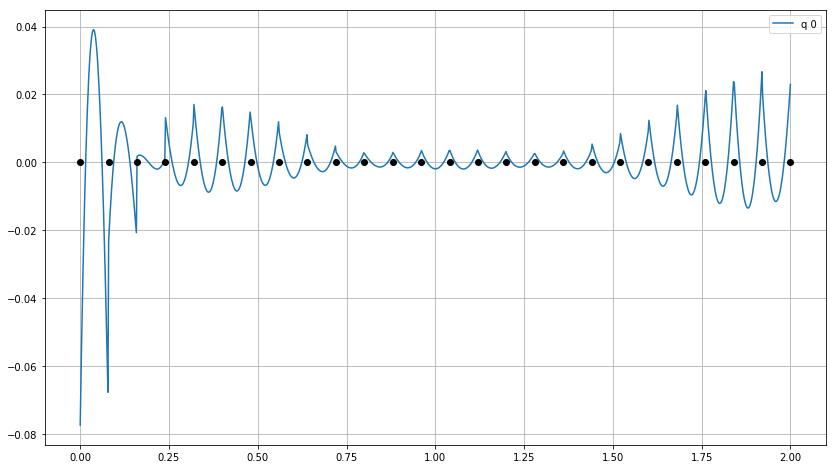

<Figure size 1008x576 with 0 Axes>

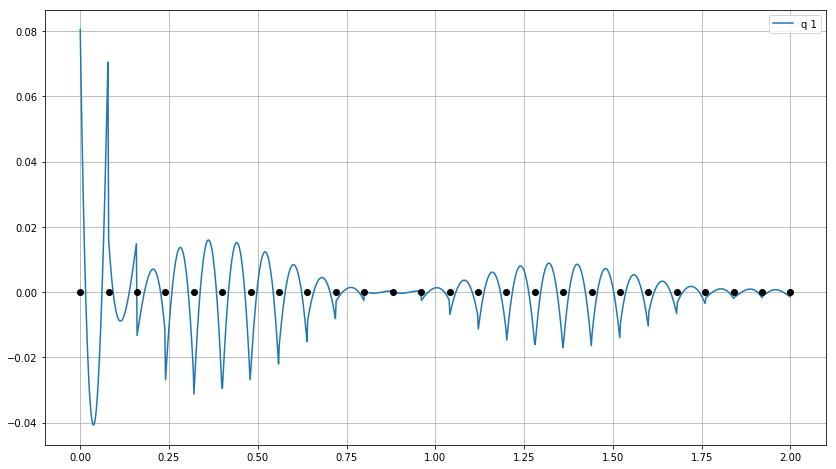

<Figure size 1008x576 with 0 Axes>

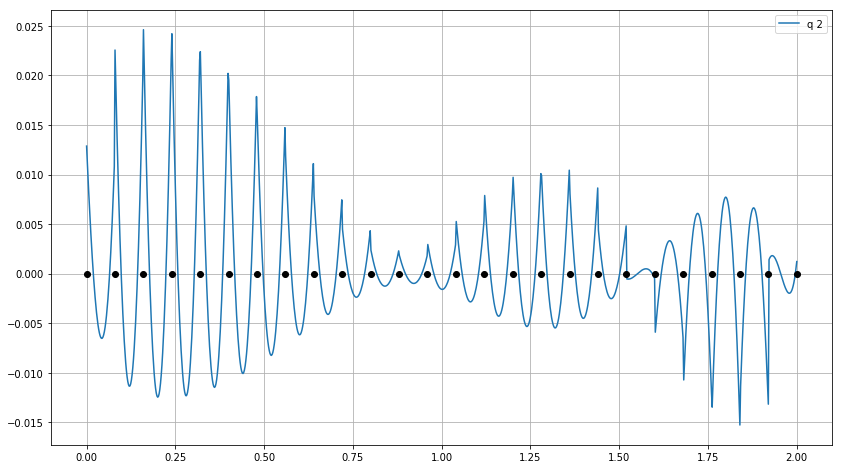

<Figure size 1008x576 with 0 Axes>

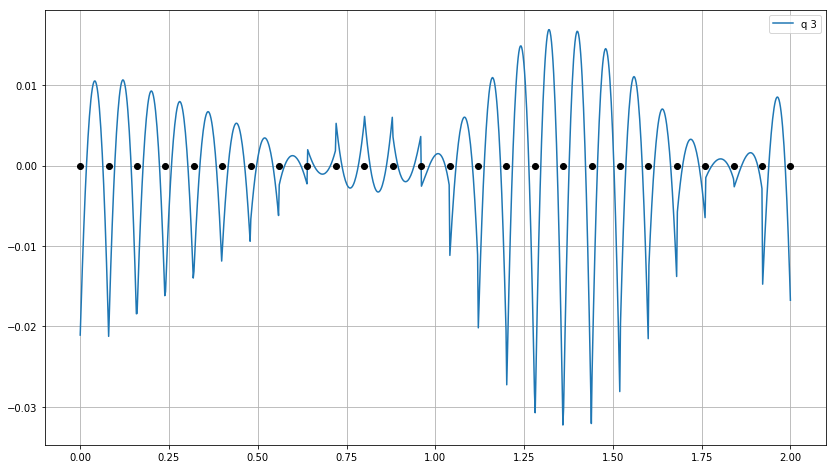

<Figure size 1008x576 with 0 Axes>

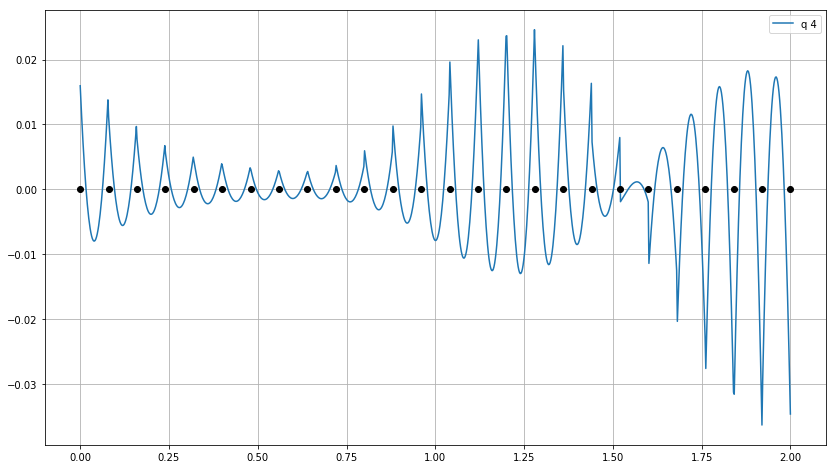

<Figure size 1008x576 with 0 Axes>

In [95]:
for ii in range(5):
    plt.figure(figsize=[14,8])
    plt.plot(t_arr,dyn_err_2_b_hs_lin[:,ii], '-', label = f'q {ii}')
    plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
    plt.legend()
    plt.grid()
    plt.figure(figsize=[14,8])


In [96]:
def state_error(t_arr, dyn_err, N,):
    n_int = len(t_arr)
    interv_n = (N * t_arr)//2
    err = []
    cut_p = 0
    for ii in range(1,N+1):
        jj = np.searchsorted(interv_n, ii)
        err_point = np.trapz(np.abs(dyn_err[cut_p:jj+1]), t_arr[cut_p:jj+1], axis=0)
        err.append(err_point)
        cut_p = jj
    err = np.array(err, dtype = float)
    return err

def total_state_error(t_arr, dyn_err):
    errors = np.trapz(np.abs(dyn_err), t_arr, axis=0)
    return errors

## Sistematic comparative

In [97]:
q_0_guess = np.array([-0.3, 0.7, 0, -0.5, -0.6])
q_1_guess = q_0_guess[::-1]
s_arr = np.linspace(0, 1, N+1)
q_guess = np.expand_dims(q_0_guess,0)+ np.expand_dims(s_arr,1)*np.expand_dims((q_1_guess - q_0_guess),0)

q_dot_guess = (q_1_guess - q_0_guess) * np.ones([N+1,1])/opti.value(T)

In [98]:
import time
def chrono_solve(opti, solve_repetitions):
    cput0 = time.time()
    for ii in range(solve_repetitions):
        sol = opti.solve()
    cput1 = time.time()
    cpudt = (cput1-cput0)/solve_repetitions
    return sol, cpudt

In [99]:
def casadi_biped(N = 25, scheme = "trapz", solve_repetitions = 1, t_end = 0.7, step_length = 0.5):
    opti = cas.Opti()
    p_opts = {"expand":True,'ipopt.print_level':0, 'print_time':0}
    s_opts = {"max_iter": 10000, 'tol': 1e-26}#, 'linear_solver' : "MA27"}
    opti.solver("ipopt",p_opts,
                        s_opts)
    
    restr_schemes = {
        'trapz': trapz_accel_restr,
        'trapz_mod' : trapz_mod_accel_restr,
        'hs': hs_accel_restr,
        'hs_mod': hs_mod_accel_restr,
        'hs_parab': hs_accel_restr,
        'hs_mod_parab': hs_mod_accel_restr
    }
    
    f_restr = restr_schemes[scheme]

    X = opti.variable(N+1,10)
    X_dot = opti.variable(N+1,10)
    U = opti.variable(N+1,5)
    if 'hs' in scheme:
        U_c = opti.variable(N,5)
        X_c = opti.variable(N,10)
        X_dot_c = opti.variable(N,10)

    T = opti.parameter()
    u_m = opti.parameter()
    Params_opti = opti.parameter(len(params))
    Add_params_opti = opti.parameter(len(additional_params))
    D = opti.parameter()

    # Cost
    if 'parab' in scheme:
        cost = cas.sum2((4*cas.sum1(U_c[:,:]**2) + cas.sum1(U[:,:]**2)+cas.sum1(U[1:-1,:]**2))/(3*N))
    else:
        cost = cas.sum2((cas.sum1(U[:,:]**2)+cas.sum1(U[1:-1,:]**2))/N)
    #cost = cas.sum2(cas.sum1(U**2))
    opti.minimize(cost)

    #Periodic gait constraint:
    opti.subject_to(simetric_5_links(X[0,:], X[-1,:]) == 0)
    opti.subject_to(impact_cond_cas_f(X[-1,:], X[0,:], Params_opti, Add_params_opti) == 0)

    #Step size constraint:
    opti.subject_to(feet_x_cas(X[-1,:], Params_opti, Add_params_opti) == D)
    opti.subject_to(feet_y_cas(X[-1,:], Params_opti, Add_params_opti) == 0)

    #Small Feet Conditions:
    opti.subject_to(U[:,0] == 0)
    opti.subject_to(feet_y_vel_cas(X[0,:], Params_opti, Add_params_opti)>0)
    opti.subject_to(feet_y_vel_cas(X[-1,:], Params_opti, Add_params_opti)<0)
    if 'hs' in scheme:
        opti.subject_to(U_c[:,0] == 0)

    #Feet over ground Restrictions:
    for ii in range(1,N):
        opti.subject_to(feet_y_cas(X[ii,:], Params_opti, Add_params_opti) > 0)

    #Dynamics Constraints:
    for ii in range(N+1):
        opti.subject_to(imp_dyn_x_f_cas(X[ii,:], X_dot[ii,:], U[ii,:], [], Params_opti) == 0)
    if 'hs' in scheme:
        for ii in range(N):
            opti.subject_to(X_c[ii,:] == hs_half_x(X[ii,:], X[ii+1,:], X_dot[ii,:], X_dot[ii+1,:], T/N))
            opti.subject_to(imp_dyn_x_f_cas(X_c[ii,:], X_dot_c[ii,:], U_c[ii,:], [], Params_opti) == 0)
        if 'parab' not in scheme:
            for ii in range(N):
                opti.subject_to(U_c[ii,:] == (U[ii,:]+U[ii+1,:])/2)

    #Scheme Constraints
    if 'hs' in scheme:
        cas_accel_restr = accelrestriction2casadi(f_restr, 5, 5)
        for ii in range(N):
            opti.subject_to(cas_accel_restr(X[ii,:], X[ii+1,:], X_dot[ii, 5:], X_dot[ii+1, 5:],T/N, X_dot_c[ii,5:]) == 0)
    else:
        cas_accel_restr = accelrestriction2casadi(f_restr, 5)
        for ii in range(N):
            opti.subject_to(cas_accel_restr(X[ii,:], X[ii+1,:], X_dot[ii, 5:], X_dot[ii+1, 5:],T/N) == 0)
    

    opti.set_value(T, t_end)#0.7
    opti.set_value(D, step_length)#0.5

    opti.set_value(Params_opti, params)
    opti.set_value(Add_params_opti, additional_params)

    opti.set_initial(X[:,:5], q_guess)
    opti.set_initial(X[:,5:], q_dot_guess)
    
    opti.set_initial(X_dot[:,:5], q_dot_guess)
    opti.set_initial(X_dot[:,5:], 0)
    opti.set_initial(U, 0)
    
    if 'hs' in scheme:
        opti.set_initial(X_c[:,:5], (q_guess[:-1,:]+q_guess[1:,:])/2)
        opti.set_initial(X_c[:,5:], q_dot_guess[:-1,:])

        opti.set_initial(X_dot_c[:,:5], q_dot_guess[:-1,:])
        opti.set_initial(X_dot_c[:,5:], 0)
        opti.set_initial(U_c, 0)

    sol, cpudt = chrono_solve(opti, solve_repetitions)

    U_sol = sol.value(U)
    X_sol = sol.value(X)
    X_dot_sol = sol.value(X_dot)
    T_sol = sol.value(T)
    T_sol_arr = np.linspace(0, T_sol, N+1)
    T_c_arr = (T_sol_arr[:-1]+T_sol_arr[1:])/2
    cost_sol = sol.value(cost)
    if 'hs' in scheme:
        U_c_sol = sol.value(U_c)
        X_c_sol = sol.value(X_c)
        X_dot_c_sol = sol.value(X_dot_c)
    else:
        U_c_sol = None
        X_c_sol = None
        X_dot_c_sol = None
        
    return{
        'u':U_sol,
        'x':X_sol,
        'x_dot':X_dot_sol,
        't':T_sol,
        't_array':T_sol_arr,
        't_c_array': T_c_arr,
        'cpudt':cpudt,
        'u_c':U_c_sol,
        'x_c':X_c_sol,
        'x_dot_c':X_dot_c_sol,
        'cost':cost_sol
    }

In [100]:
schemes = ['hs', 'hs_mod', 'hs_parab', 'hs_mod_parab']
solve_repetitions = 3
N_arr = [10,15,20,25]#,30,40,50,75,100,150]

results = {}

for scheme in schemes:
    key = scheme
    print('Problem:', key)
    results[key] = {'N_arr':N_arr}
    for N in N_arr:
        print(f'\tN = {N}')
        results[key][N] = casadi_biped(
            N = 25,
            scheme = scheme,
            solve_repetitions = solve_repetitions,
            t_end = 0.7,
            step_length = 0.5)

Problem: hs
	N = 10
	N = 15
	N = 20
	N = 25
Problem: hs_mod
	N = 10
	N = 15
	N = 20
	N = 25
Problem: hs_parab
	N = 10
	N = 15
	N = 20
	N = 25
Problem: hs_mod_parab
	N = 10
	N = 15
	N = 20
	N = 25


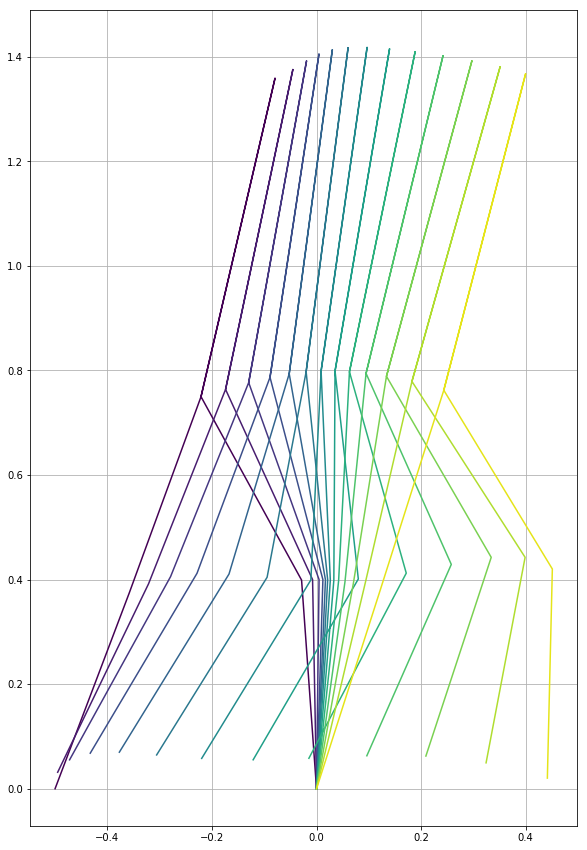

In [101]:
plt.figure(figsize=[15,15])
plt.grid()
for ii in range(0, N+1, 2):
    points_x, points_y = chain_to_draw(results['hs_mod'][25]['x'][ii], params)
    plt.plot(points_x, points_y, color = plt.cm.viridis(ii/N))
    

plt.gca().set_aspect('equal')

In [90]:
def create_anim_simp(X, U, params):
    [
    I_0_n, I_1_n, I_2_n, I_3_n, I_4_n,
    d_0_n, d_1_n, d_2_n, d_3_n, d_4_n,
    g_n,
    l_0_n, l_1_n, l_3_n,
    m_0_n, m_1_n, m_2_n, m_3_n, m_4_n
    ] = params
    
    N = X.shape[0]
    fig, ax = plt.subplots()
    
    y_scale = 1
    min_x_cart = np.min(X[:,0])
    max_x_cart = np.max(X[:,0])
    cart_displ = max_x_cart-min_x_cart
    size_x = 2*y_scale + cart_displ
    size_y = 2*y_scale
    draw_width = 14
    draw_height = draw_width / size_x * size_y
    
    x_0 = X[:,0]
    y_0 = np.zeros_like(x_0)
    x_1 = x_0 + l_3*np.sin(X[:,1])
    y_1 = y_0 - l_3*np.cos(X[:,1])
    
    x_cm = (m_0 * x_0 + m_2 * x_1)/(m_0 + m_2)
    y_cm = (m_0 * y_0 + m_2 * y_1)/(m_0 + m_2)

    fig.set_size_inches([draw_width,draw_height])
    ax.set_xlim(( min_x_cart-y_scale, max_x_cart+y_scale))
    ax.set_ylim(( -y_scale, y_scale))

    circle1 = plt.Circle((0, 0), l_3, color='b', ls = ":", fill=False)
    ax.add_artist(circle1)
    ax.plot([min_x_cart - l_3, max_x_cart + l_3], [0,0], 'k', lw=1, ls = ':')

    line1, = ax.plot([], [], lw=2)
    line3, = ax.plot([], [], 'k', lw=1, ls = ':')
    line_cm, = ax.plot([], [], 'g', lw=1, ls = ':')
    point0, = ax.plot([], [], marker='o', markersize=15, color="red")
    point1, = ax.plot([], [], marker='o', markersize=15, color="red")
    point_cm, = ax.plot([], [], marker='o', markersize=10, color="green")
    u_max = max(np.max(np.abs(U[:,0])),1e-15)
    arrow_w = 0.05*l_3
    arrow_l = 0.2*l_3
    u_arrow = patches.Arrow(0, 0, 0, -arrow_l, color = 'gray',width = arrow_w)
    ax.add_patch(u_arrow)
    
    print_vars = [X[:,0], X[:,1], U[:,0], U[:,1], np.linspace(0, N-1, N, dtype=int)]
    print_var_names = ['q_0', 'q_1', 'u_0', 'u_1', 'step']
    texts = []
    ii = 0
    for arr in print_vars:
        texts.append(ax.text(0.2, ii, "", fontsize = 12))
        ii -= 0.08*l_3
    
    def init():
        line1.set_data([], [])
        line3.set_data([], [])
        line_cm.set_data([], [])
        point1.set_data([], [])
        circle1.center = (0, 0)
        return (line1,)
    def animate(i):
        circle1.center = (x_0[i], y_0[i])
        point0.set_data(x_0[i], y_0[i])
        line1.set_data([x_0[i], x_1[i]], [y_0[i], y_1[i]])    
        point1.set_data(x_1[i], y_1[i])
        point_cm.set_data(x_cm[i], y_cm[i])
        line3.set_data(x_1[:i], y_1[:i])
        line_cm.set_data(x_cm[:i], y_cm[:i])
        trans = Affine2D()
        u_arrow._patch_transform = trans.scale(U[i,0] * arrow_l / u_max, arrow_w).translate(x_0[i],0)
        for ii in range(len(texts)):
            text = texts[ii]
            name = print_var_names[ii]
            arr = print_vars[ii]
            text.set_text("$" + name + "$ = %.6f" % arr[i])
        return (line1,u_arrow)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, 
                               blit=True)
    return anim

In [91]:
def gen_ini_guess(N = 25, ini_guess = 'zero'):
    if ini_guess == 'zero':
        x_init_guess = np.zeros([N+1,4])
    elif ini_guess == 'lin':
        def_q1 = np.linspace(0,1,N+1)
        def_q2 = np.linspace(0,np.pi,N+1)
        def_v1 = np.zeros(N+1)
        def_v2 = np.zeros(N+1)
        x_init_guess = np.array([def_q1, def_q2, def_v1, def_v2]).T
    elif ini_guess == 'funcs':
        def_t = np.linspace(0,2,N+1)
        def_q1 = (0.8*np.arctan(def_t*3))**2
        def_q2 = -np.sin(3*def_t**0.8)*def_t*2
        def_v1 = np.sin(5*def_t)/(def_t+0.2)
        def_v2 = -3*np.sin(5*def_t**0.8)*(4*def_t - 2*def_t**2)
        x_init_guess = np.array([def_q1, def_q2, def_v1, def_v2]).T
    return x_init_guess

def sol_value(u_arr):
    N = len(u_arr)
    return(np.sum(u_arr[:]**2)+np.sum(u_arr[1:-1]**2))/N

In [92]:
import time
def chrono_solve(opti, solve_repetitions):
    cput0 = time.time()
    for ii in range(solve_repetitions):
        sol = opti.solve()
    cput1 = time.time()
    cpudt = (cput1-cput0)/solve_repetitions
    return sol, cpudt


In [93]:
def casadi_cartpole(N = 25, scheme = 'euler', ini_guess = 'zero', solve_repetitions = 1):
    opti = cas.Opti()
    p_opts = {"expand":True,'ipopt.print_level':0, 'print_time':0}
    s_opts = {"max_iter": 10000, 'tol': 1e-26}#, 'linear_solver' : "MA27"}
    opti.solver("ipopt",p_opts,
                        s_opts)
    restr_schemes = {
        'euler': euler_restr,
        'trapz': trapz_restr,
        'trapz_mod' : trapz_mod_restr,
        'hs': hs_restr,
        'hs_mod': hs_mod_restr,
        'hs_parab': hs_parab_restr,
        'hs_mod_parab': hs_mod_parab_restr
    }
    
    f_restr = restr_schemes[scheme]
    if scheme in ['hs_parab', 'hs_mod_parab']:
        parab = True
    else:
        parab = False
    X = opti.variable(N+1,4)
    U = opti.variable(N+1,1)
    if parab:
        U_c = opti.variable(N,1)
    T = opti.parameter()
    u_m = opti.parameter(1)
    Params = opti.parameter(4)

    cost = (cas.sum1(U[:,0]**2)+cas.sum1(U[1:-1,0]**2))/N
    if parab:
        cost = (4*cas.sum1(U_c[:,0]**2) + cas.sum1(U[:,0]**2)+cas.sum1(U[1:-1,0]**2))/(3*N)
    #cost = cas.sum1(cas.cos(X[:,1]))
    #cost = T
    opti.minimize(cost)

    opti.subject_to(X[0,:].T == [0, 0, 0, 0])
    opti.subject_to(X[-1,:].T == [1, np.pi, 0, 0])
    if parab: 
        restriction = restriction2casadi(f_restr, F_cas_simp, 2, 1, 4, 1)
    else:
        restriction = restriction2casadi(f_restr, F_cas_simp, 2, 1, 4)

    for ii in range(N):
        if parab:
            opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1],T/N, Params, U_c[ii])==0)
            opti.subject_to(opti.bounded(-u_m, U_c[ii] ,u_m))
        else:
            opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],T/N, Params)==0)
        opti.subject_to(opti.bounded(-u_m,U[ii],u_m))

    opti.subject_to(opti.bounded(-u_m,U[-1, 0],u_m))
    opti.set_value(T, 2)
    max_f = 20.0
    opti.set_value(u_m, max_f)

    m0_n, m1_n = [1., 0.3]
    l_n = 0.5
    g_n = 9.81
    opti.set_value(Params, [g_n, l_n, m0_n, m1_n])
    
    opti.set_initial(X, gen_ini_guess(N, ini_guess))
    sol, cpudt = chrono_solve(opti, solve_repetitions)
    xx_simp = sol.value(X)
    uu_simp = sol.value(U)
    if parab:
        uu_c = sol.value(U_c)
    else:
        uu_c = None
    return xx_simp, uu_simp, uu_c, cpudt

In [94]:
schemes = ['hs', 'hs_mod', 'hs_parab', 'hs_mod_parab']
initials = ['lin', 'funcs']
solve_repetitions = 3
N_arr = [10,15,20,25,30,40,50,75,100,150]

results = {}

for scheme in schemes:
    for init in initials:
        key = scheme + '_' + init
        print('Problem:', key)
        results[key] = {'N_arr':N_arr}
        for N in N_arr:
            print(f'\tN = {N}')
            xx, uu, uu_c, cpudt = casadi_cartpole(N, scheme, init, solve_repetitions)
            results[key][N] = {
                'x': xx,
                'u': uu,
                'u_c': uu_c,
                'cpudt': cpudt
            }


#xx_hs_lin, uu_hs_lin, _, cpudt_hs_lin = casadi_cartpole(25, 'hs', ini_guess = 'lin', solve_repetitions = 10)
#xx_hs_fun, uu_hs_fun, _, cpudt_hs_fun = casadi_cartpole(25, 'hs', ini_guess = 'funcs', solve_repetitions = 10)
#xx_mod_lin, uu_mod_lin, _, cpudt_mod_lin = casadi_cartpole(25, 'hs_mod', ini_guess = 'lin', solve_repetitions = 10)
#xx_mod_fun, uu_mod_fun, _, cpudt_mod_fun = casadi_cartpole(25, 'hs_mod', ini_guess = 'funcs', solve_repetitions = 10)

#xx_hs_par_lin, uu_hs_par_lin, uu_c_hs_par_lin, cpudt_hs_par_lin = casadi_cartpole(25, 'hs_parab', ini_guess = 'lin', solve_repetitions = 10)
#xx_hs_par_fun, uu_hs_par_fun, uu_c_hs_par_fun, cpudt_hs_par_fun = casadi_cartpole(25, 'hs_parab', ini_guess = 'funcs', solve_repetitions = 10)
#xx_mod_par_lin, uu_mod_par_lin, uu_c_mod_par_lin, cpudt_mod_par_lin = casadi_cartpole(25, 'hs_mod_parab', ini_guess = 'lin', solve_repetitions = 10)
#xx_mod_par_fun, uu_mod_par_fun, uu_c_mod_par_fun, cpudt_mod_par_fun = casadi_cartpole(25, 'hs_mod_parab', ini_guess = 'funcs', solve_repetitions = 10)

Problem: hs_lin
	N = 10


NameError: name 'euler_restr' is not defined

In [ ]:
def parab_cost(U, U_c, N = 25):
    cost = (4*np.sum(U_c[:,]**2) + np.sum(U[:,]**2)+np.sum(U[1:-1,]**2))/(3*N)
    return cost

In [ ]:
parab_cost(results['hs_parab_funcs'][25]['u'],results['hs_parab_funcs'][25]['u_c'])

In [ ]:
parab_cost(results['hs_parab_lin'][25]['u'],results['hs_parab_lin'][25]['u_c'])

In [ ]:
for scheme in schemes:
    for init in initials:
        key = scheme + '_' + init
        print(key, results[key][25]['cpudt'])

In [ ]:
plt.figure(figsize=[16,10])
labels = ['q1','q2','v1','v2']
#for ii in range(4):
ii = 0
key = 'hs_parab_lin'
plt.plot(results[key][25]['x'][:,ii], label = labels[ii])
key = 'hs_mod_parab_lin'
plt.plot(results[key][25]['x'][:,ii], label = labels[ii])
plt.grid()
plt.legend()

In [ ]:
plt.figure(figsize=[16,10])
key = 'hs_parab_lin'
plt.plot(np.linspace(0,2,26),results[key][25]['u'][:], 'o',label = 'u Siro')
plt.plot(np.linspace(0,2,51)[1::2],results[key][25]['u_c'][:], 'o',label = 'u_c Siro')

key = 'hs_mod_parab_lin'
plt.plot(np.linspace(0,2,26),results[key][25]['u'][:], 'o',label = 'u Siro')
plt.grid()
plt.legend()

In [ ]:
from optibot.schemes import integrate_hs, integrate_trapz, integrate_euler, integrate_rk4, integrate_hs_mod

In [ ]:
from optibot.numpy import RHS2numpy

In [ ]:
F_nump = RHS2numpy(RHS_small, 2)

In [ ]:
F_nump([0,0,0,0],[0.5,], params)

In [ ]:
from optibot.schemes import interpolated_array, interpolated_array_derivative, dynamic_error

In [ ]:
key = 'hs_parab_funcs'
N_prob = 25
xx_hs_parab_lin_int, uu_hs_parab_lin_int = interpolated_array(
    results[key][N_prob]['x'],
    results[key][N_prob]['u'],
    F_nump,
    2/N_prob,
    np.linspace(0, 2, 2000),
    params,
    "hs_parab",
    'parab',
    [results[key][N_prob]['u_c'],]
)
plt.figure(figsize=[16,8])
plt.plot(np.linspace(0,2,N_prob+1),results[key][N_prob]['u'][:], 'o',label = 'u Siro')
plt.plot(np.linspace(0,2,2*N_prob+1)[1::2],results[key][N_prob]['u_c'][:], 'o',label = 'u_c Siro')
plt.plot(np.linspace(0,2,2000),uu_hs_parab_lin_int, label = 'interp Siro')
plt.grid()
plt.legend()
ii = 3
plt.figure(figsize=[16,10])
plt.plot(np.linspace(0,2,N_prob+1),results[key][N_prob]['x'][:,ii], 'o',label = 'X Siro')
plt.plot(np.linspace(0,2,2000),xx_hs_parab_lin_int[:,ii], label = 'interp Siro')
plt.grid()
plt.legend()

In [ ]:
n_graph = 1000
t_arr = np.linspace(0,2,n_graph)
key = 'hs_parab_lin'
dyn_err_q_hs_lin, dyn_err_v_hs_lin, dyn_err_2_a_hs_lin, dyn_err_2_b_hs_lin = dynamic_error(
    results[key][25]['x'], results[key][25]['u'], 2, F_nump, params,
    scheme = 'hs_parab', scheme_params=[results[key][25]['u_c'],],
    n_interp= n_graph)


plt.figure(figsize=[14,8])
ii = 0
plt.plot(t_arr,-dyn_err_q_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()
plt.figure(figsize=[14,8])
ii = 1
plt.plot(t_arr,-dyn_err_q_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()

In [ ]:
n_graph = 10000
t_arr = np.linspace(0,2,n_graph)
key = 'hs_parab_lin'
dyn_err_q_hs_lin, dyn_err_v_hs_lin, dyn_err_2_a_hs_lin, dyn_err_2_b_hs_lin = dynamic_error(
    results[key][25]['x'], results[key][25]['u'], 2, F_nump, params,
    scheme = 'hs_parab', u_scheme='parab', scheme_params=[results[key][25]['u_c'],],
    n_interp= n_graph)


plt.figure(figsize=[14,8])
ii = 0
plt.plot(t_arr,dyn_err_v_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()
plt.figure(figsize=[14,8])
ii = 1
plt.plot(t_arr,dyn_err_v_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()

In [ ]:
n_graph = 10000
t_arr = np.linspace(0,2,n_graph)
key = 'hs_lin'
dyn_err_q_hs_lin, dyn_err_v_hs_lin, dyn_err_2_a_hs_lin, dyn_err_2_b_hs_lin = dynamic_error(
    results[key][25]['x'], results[key][25]['u'], 2, F_nump, params,
    scheme = 'hs', scheme_params=[results[key][25]['u_c'],],
    n_interp= n_graph)


plt.figure(figsize=[14,8])
ii = 0
plt.plot(t_arr,dyn_err_v_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()
plt.figure(figsize=[14,8])
ii = 1
plt.plot(t_arr,dyn_err_v_hs_lin[:,ii], '-', label = f'q {ii}')
plt.plot(np.linspace(0,2,26), np.zeros(26), 'ok')
plt.legend()
plt.grid()

In [ ]:
def state_error(t_arr, dyn_err, N,):
    n_int = len(t_arr)
    interv_n = (N * t_arr)//2
    err = []
    cut_p = 0
    for ii in range(1,N+1):
        jj = np.searchsorted(interv_n, ii)
        err_point = np.trapz(np.abs(dyn_err[cut_p:jj+1]), t_arr[cut_p:jj+1], axis=0)
        err.append(err_point)
        cut_p = jj
    err = np.array(err, dtype = float)
    return err

def total_state_error(t_arr, dyn_err):
    errors = np.trapz(np.abs(dyn_err), t_arr, axis=0)
    return errors

In [ ]:
st_err = state_error(t_arr, dyn_err_2_b_hs_lin, 25)
plt.figure(figsize=[12,6])
ii = 0
plt.plot(np.linspace(0,2,26)[1:],st_err[:,ii], 'o', label = f'q {ii}')
plt.legend()
plt.grid()
plt.figure(figsize=[12,6])
ii = 1
plt.plot(np.linspace(0,2,26)[1:],st_err[:,ii], 'o', label = f'q {ii}')
plt.legend()
plt.grid()

In [ ]:
schemes = ['hs', 'hs_mod', 'hs_parab', 'hs_mod_parab']
initials = ['lin', 'funcs']
n_interp = 500
for scheme in schemes:
    for init in initials:
        key = scheme + '_' + init
        print('Problem:', key)
        N_arr = results[key]['N_arr']
        for N in N_arr:
            print(f'\tN = {N}')
            if 'parab' in scheme:
                u_scheme = 'parab'
            else:
                u_scheme = 'lin'
            dyn_err_q, dyn_err_v, dyn_err_2_a, dyn_err_2_b = dynamic_error(
                results[key][N]['x'],
                results[key][N]['u'],
                2,
                F_nump,
                params,
                scheme = scheme,
                u_scheme= u_scheme,
                scheme_params=[results[key][N]['u_c'],],
                n_interp = n_interp)
            t_arr = np.linspace(0,2, n_interp)
            tot_dyn_err_q = total_state_error(t_arr, dyn_err_q)
            tot_dyn_err_v = total_state_error(t_arr, dyn_err_v)
            tot_dyn_err_2_a = total_state_error(t_arr, dyn_err_2_a)
            tot_dyn_err_2_b = total_state_error(t_arr, dyn_err_2_b)
            results[key][N]['err_q_int'] = dyn_err_q
            results[key][N]['err_v_int'] = dyn_err_v
            results[key][N]['err_2_a_int'] = dyn_err_2_a
            results[key][N]['err_2_b_int'] = dyn_err_2_b
            results[key][N]['err_q'] = tot_dyn_err_q
            results[key][N]['err_v'] = tot_dyn_err_v
            results[key][N]['err_2_a'] = tot_dyn_err_2_a
            results[key][N]['err_2_b'] = tot_dyn_err_2_b

In [ ]:
schemes = ['hs', 'hs_mod', 'hs_parab', 'hs_mod_parab']
initials = ['lin', 'funcs']
for scheme in schemes:
    for init in initials:
        key = scheme + '_' + init
        print('Problem:', key)
        N_arr = results[key]['N_arr']
        err_q_acum = []
        err_v_acum = []
        err_2_a_acum = []
        err_2_b_acum = []
        cpudt = []
        for N in N_arr:
            err_q_acum.append(results[key][N]['err_q'])
            err_v_acum.append(results[key][N]['err_v'])
            err_2_a_acum.append(results[key][N]['err_2_a'])
            err_2_b_acum.append(results[key][N]['err_2_b'])
            cpudt.append(results[key][N]['cpudt'])
        results[key]['err_q_acum'] = np.array(err_q_acum, dtype = float)
        results[key]['err_v_acum'] = np.array(err_v_acum, dtype = float)
        results[key]['err_2_a_acum'] = np.array(err_2_a_acum, dtype = float)
        results[key]['err_2_b_acum'] = np.array(err_2_b_acum, dtype = float)
        results[key]['cpudt'] = np.array(cpudt, dtype = float)

In [ ]:
results[key]['cpudt']

In [ ]:
results['hs_parab_lin'][25]['err_2_b']

In [ ]:
results['hs_mod_parab_lin'][25]['err_2_b']

In [ ]:
results['hs_lin'][25]['err_2_b']

In [ ]:
results['hs_mod_lin'][25]['err_2_b']

In [ ]:
schemes_graph = ['hs', 'hs_mod','hs_parab', 'hs_mod_parab']
data_array = ['err_q_acum','err_v_acum','err_2_b_acum','cpudt']
initial = 'lin'
plt.figure(figsize=[16,12])


data_key = data_array[2]
qq = 0
plt.title(data_key)
for scheme in schemes_graph:
    key = scheme + '_' + initial
    print('Problem:', key)
    N_arr = results[key]['N_arr']
    if len(results[key][data_key].shape) == 1:
        plt.plot(N_arr,results[key][data_key], marker = 'o',label = key)
    else:
        plt.plot(N_arr,results[key][data_key][:,qq], marker = 'o',label = key)
plt.yscale('log')
plt.grid()
plt.legend()

### Other checks

In [ ]:
from optibot.schemes import hs_opti_step, hs_mod_opti_step, hs_parab_opti_step, hs_mod_parab_opti_step

In [ ]:
n = 1
F_nump(
    results['hs_parab_lin'][25]['x'][n,:],
    results['hs_parab_lin'][25]['u'][n],
    params
)

In [ ]:
F_nump(
    results['hs_parab_lin'][25]['x'][n,:],
    results['hs_parab_lin'][25]['u'][n],
    params
)- np.array([0.328536435248556, -0.646480161416857, 5.98899879213531,  -11.5422545622471])

In [ ]:
eq_err_Siro_notop = []
kk  = 3
for ii in range(25):
    eq_err_Siro_notop.append(
        list(hs_parab_opti_step(
            results['hs_parab_lin'][25]['x'][ii+1,:],
            results['hs_parab_lin'][25]['x'][ii,:],
            results['hs_parab_lin'][25]['u'][ii],
            results['hs_parab_lin'][25]['u'][ii+1],
            F_nump, 2/25, params,
            results['hs_parab_lin'][25]['u_c'][ii]))
    )
eq_err_Siro_notop = np.array(eq_err_Siro_notop)
plt.figure(figsize=[16,10])
plt.plot(eq_err_Siro_notop[:,kk], label = 'eq_err_Siro_notop')
plt.grid()

In [ ]:
def x_central(x, x_n, h, f, f_n):
        return (x + x_n)/2 + h/8*(f-f_n)